#  Laboratorium z Podstaw Przetwarzania Sygnałów
## Laboratorium 4 - Sygnały nieokresowe i szum

prowadzący: dr inż. Łukasz Jeleń  
  
Dzisiejsze zadania pochodzą z Allen B. Downey, Think DSP, Digital Signal Processing in Python, Green Tea Press, Wersja 1.0.5

Nazwisko i Imię: Jan Zieniewicz  
Nr albumu: 263930  
data wykonania ćwiczenia: 22.11.2022r   

w celu zachowania przeniesienia do kolejnej linii należy się upewnić, że na końcu linii znajduje się 2x spacja

## Zestaw narzędzi  

Na poprzednich zajęciach poznali Państwo narzędzia udostępnionne przez Autora podręcznika "Think DSP". W poniższej komórce macie Państo dane do ich pobrania - dla przypomnienia. 

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Sygnały o modulacji szerokopasmowej  

Do tej pory prcaowaliśmy z sygnałami okresowymi, co oznacza, że składowe częśtotliwości nie zmieniały się w czasie. Dzisiaj zapoznamy się z sgnałami nieokrsowymi, gdzie modulacja częstotliwości nośnej jest liniowo zmienna w czasie. Ma to duże znaczenie w telekomunikacji.
W dalszych częściach zapoznamy się także ze spektogramem, który jest często wykorzystywany do reprezentacji sygnałów nieokresowych. 

Jako reprezentację sygnału nieokresowego zapoznamy się tzw. sygnałami świergotowymi (ang. Chirp signals). Tutaj częstotliwość fali nośnej będzie modulowana w znany sposób oraz przesyłana w czasie trwania impulsu.   
  
    
Zaczniemy od utworznia sygnały świergotowego:

In [2]:
from thinkdsp import Chirp

signal = Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

Wyświtlimy początkowy przebieg sygnału

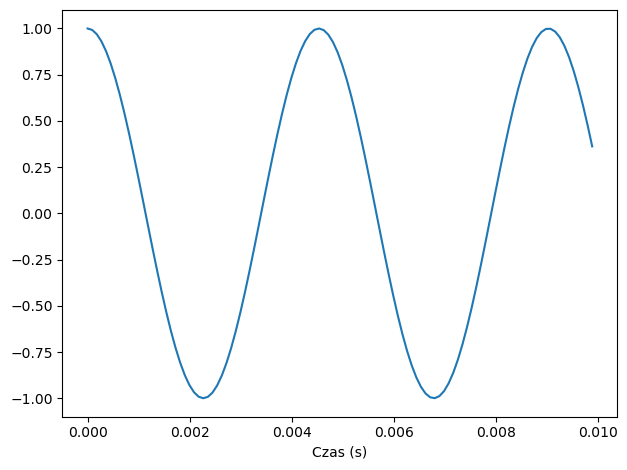

In [3]:
wave1.segment(start=0, duration=0.01).plot()
decorate(xlabel='Czas (s)')

oraz końcowy

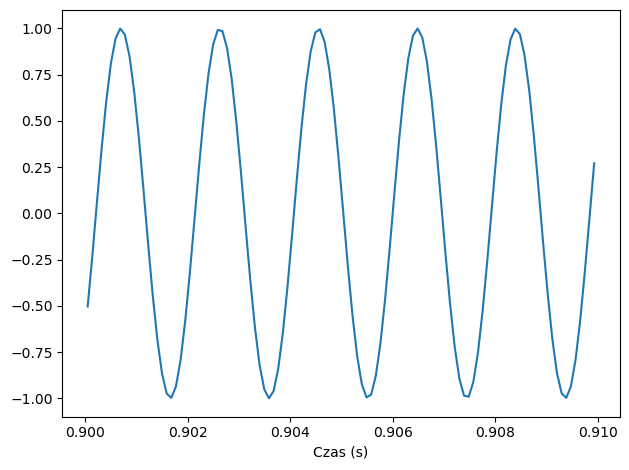

In [4]:
wave1.segment(start=0.9, duration=0.01).plot()
decorate(xlabel='Czas (s)')

Wyświtlimy teraz spektrum dla naszego sygnału

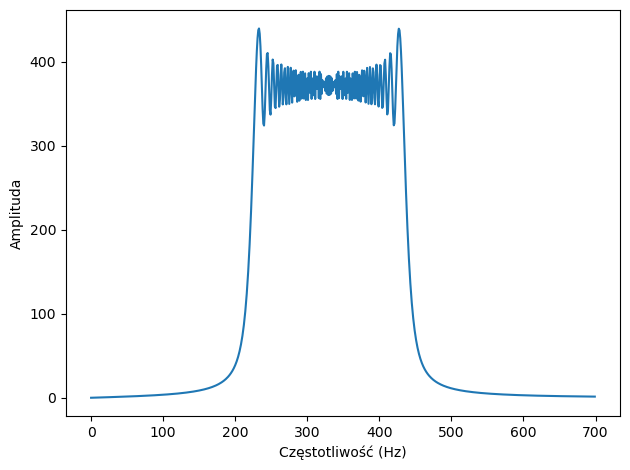

In [5]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700)
decorate(xlabel='Częstotliwość (Hz)', ylabel='Amplituda')

##Spektrogramy  

Wnioskując po otryzmanym wykresie, wyznaczenie spektrum sysnału nieokresowego nie jest łatwo interpretowalne.  
Stworzymy zatem funkcję, która zamiast dyskretnej transformaty Fouriera wyświetli jej wersję dla małych odcinków czasowych, tzw. short-time DFT. Proces ten jest nazywany `spektrogramem` sygnału. 

In [6]:
def plot_spectrogram(wave, seg_length):
    """
    """
    spectrogram = wave.make_spectrogram(seg_length)
    print('Rozdzielczość czasowa (s)', spectrogram.time_res)
    print('Rozdzielczość częstotliwościowa (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    decorate(xlabel='Czas(s)', ylabel='Częstotliwość (Hz)')


Rozdzielczość czasowa (s) 0.046439909297052155
Rozdzielczość częstotliwościowa (Hz) 21.533203125


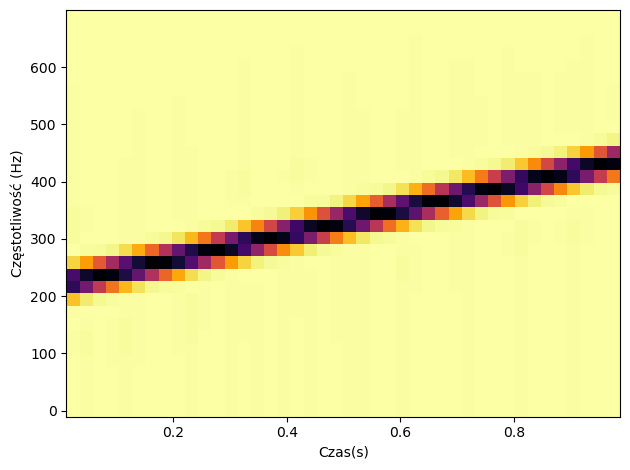

In [7]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

Zwiększenie długości segmetu pozwli poprawić rozdzielczość częstotliwości, ale pogorszy czasową:


Rozdzielczość czasowa (s) 0.09287981859410431
Rozdzielczość częstotliwościowa (Hz) 10.7666015625


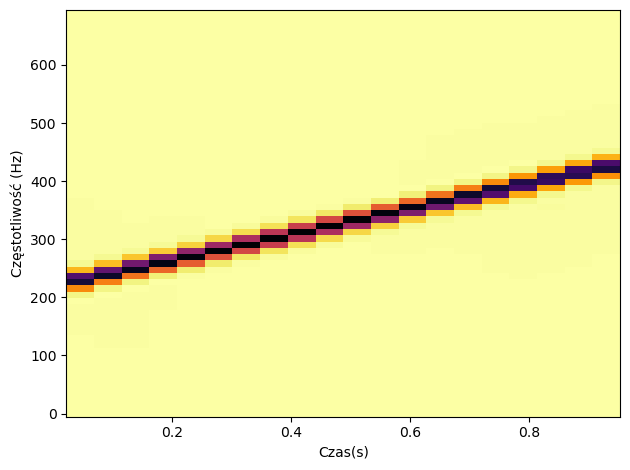

In [8]:
plot_spectrogram(wave, 1024)

## Szum 

Szumem określa się niechciany lub niemiły dźwięk. W przetwarzaniu sygnałów szumem będziemy nazywać sygnały, które zawierają składowe o wielu częśtotliwościach powodując brai w strukturze harmoniczynych. 
n English, “noise” means an unwanted or unpleasant sound.   
  
Najprostrzym szumem jest tzw. szum nieskorelowany:

In [9]:
from thinkdsp import UncorrelatedUniformNoise

signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

Poniżej wycinek przebiegu takiego szumu oraz jego spektrum

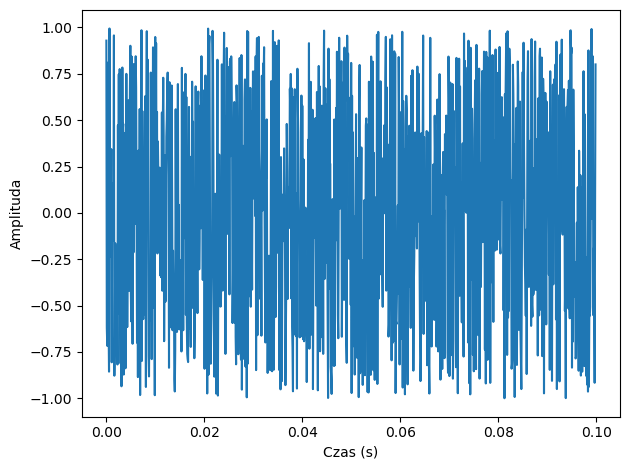

In [10]:
segment = wave.segment(duration=0.1)
segment.plot()
decorate(xlabel='Czas (s)',
         ylabel='Amplituda')

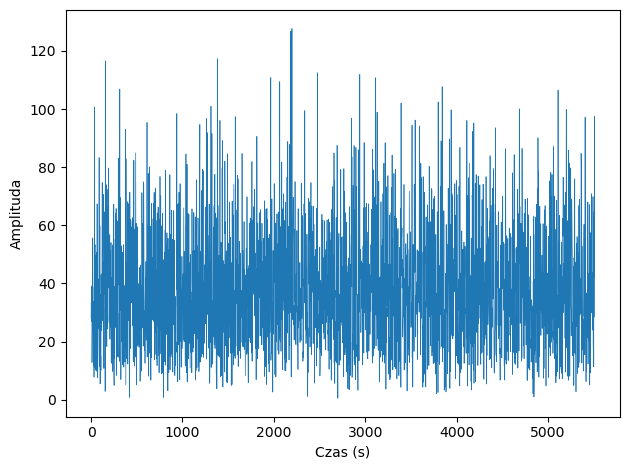

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot(linewidth=0.5)
decorate(xlabel='Czas (s)',
         ylabel='Amplituda')

Z perspektywy szumu lepiej jest przedstwaić tzw. spektrum mocy, które jest wyznaczane jako kwadrat amplitudy. 

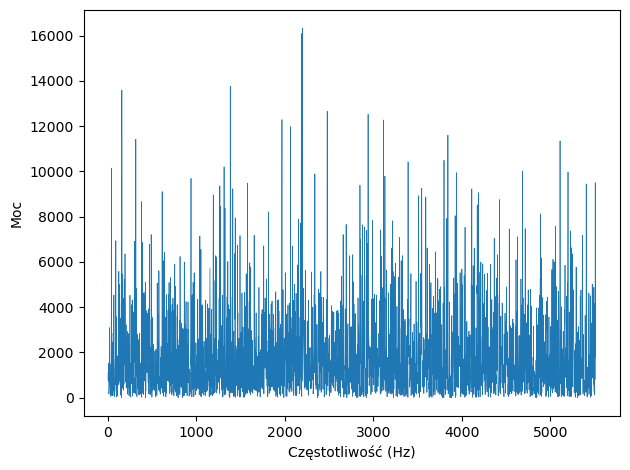

In [12]:
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Częstotliwość (Hz)',
         ylabel='Moc')

Przeważnie, szum nieskorelowany ma taką samą moc dla wszystkich częstotliwości, co można potwierdzić na wykresie znormalizowanej sumy mocy:


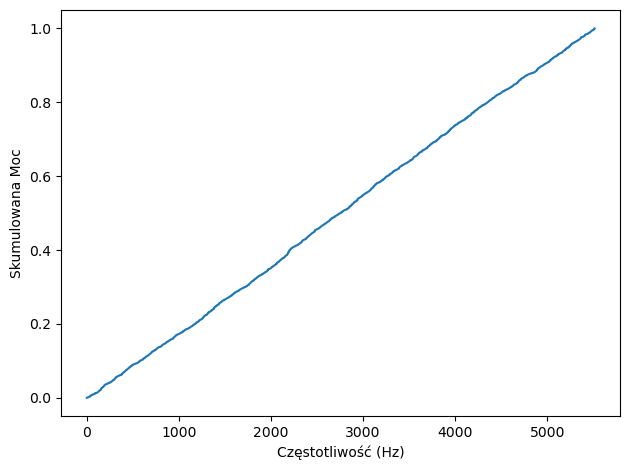

In [13]:
integ = spectrum.make_integrated_spectrum()
integ.plot_power()
decorate(xlabel='Częstotliwość (Hz)',
         ylabel='Skumulowana Moc')

###Szum czerwony  

Szum wytwarzany podaczas tzw. ruchów Browna i jest generowany przez dodanie sekwencji losowych kroków.

In [14]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

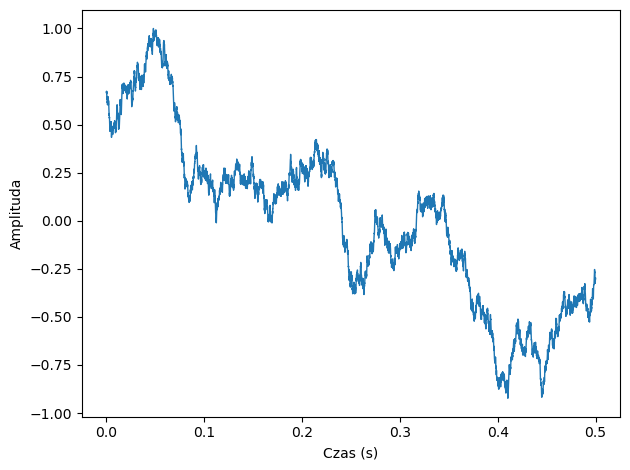

In [15]:
wave.plot(linewidth=1)
decorate(xlabel='Czas (s)',
         ylabel='Amplituda')

spektrum mocy:

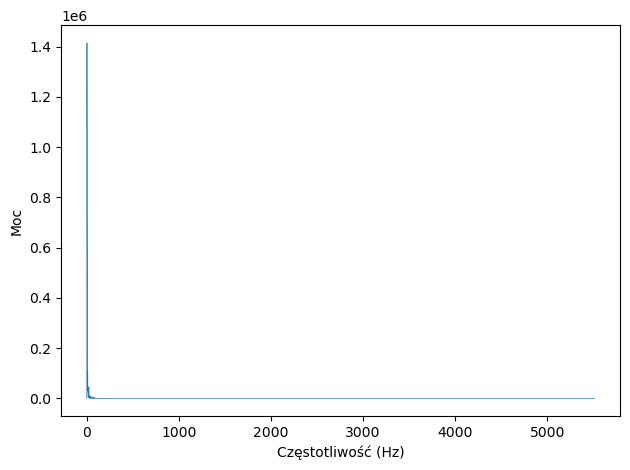

In [16]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Częstotliwość (Hz)',
         ylabel='Moc')

dla lepszej wizualizacji w skali log-log

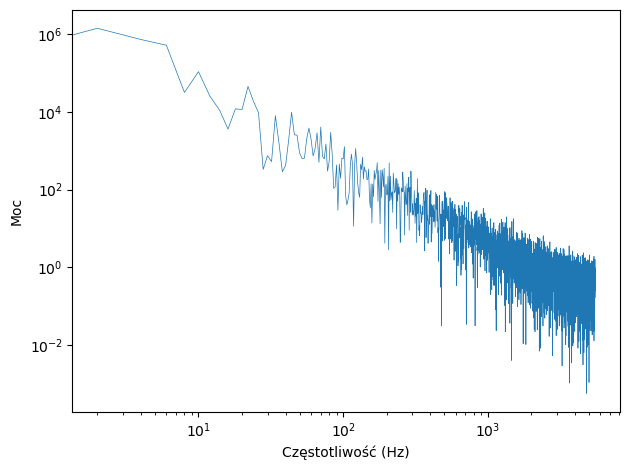

In [17]:
spectrum.hs[0] = 0

spectrum.plot_power(linewidth=0.5)

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Częstotliwość (Hz)',
         ylabel='Moc',
         **loglog)

Z powyższego wykresu łatwo można wyznaczyć zależność mocy od częstotliwości


In [18]:
signal =  BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
result = spectrum.estimate_slope()
result.slope

-1.7919007747825748

### Szum różowy

Tuaj widmowa gęstość mocy jest odwrotnie proporcjonalna do częstotliwości

In [19]:
from thinkdsp import PinkNoise

signal = PinkNoise(beta=1) #jeśli zmienimy na beta=2 otrzymamy szum czerwony
wave = signal.make_wave(duration=0.5)
wave.make_audio()

Poniższy wykres przedstawia w skali log-log spektra mocy dla szumu białego, różowego i czerwonego

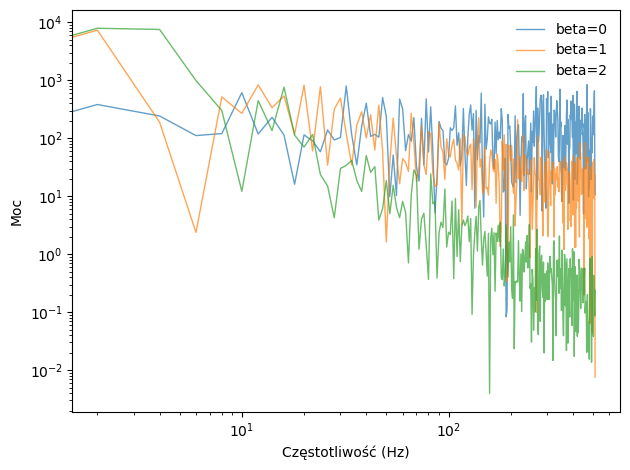

In [20]:
betas = [0, 1, 2]

for beta in betas:
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5, framerate=1024)
    spectrum = wave.make_spectrum()
    spectrum.hs[0] = 0
    label = f'beta={beta}'
    spectrum.plot_power(linewidth=1, alpha=0.7, label=label)
    
decorate(xlabel='Częstotliwość (Hz)',
         ylabel='Moc',
         **loglog)

## Zadania

### Zadanie 1 

Utwórz sygnał o modulacji szerokopasmowej (chirp) w przedziale od 2500 do 3000 Hz. Następnie wykorzytaj go do utworzenia fali dźwiękowej o długości 1 s i częstotliowści 20 kHz. Predstaw spektrum otrzymanego sygnału. 

In [21]:
from thinkdsp import Chirp

sygnal=Chirp(start=2500, end=3000)
fala=sygnal.make_wave(duration=1, framerate=20_000)
fala.make_audio()

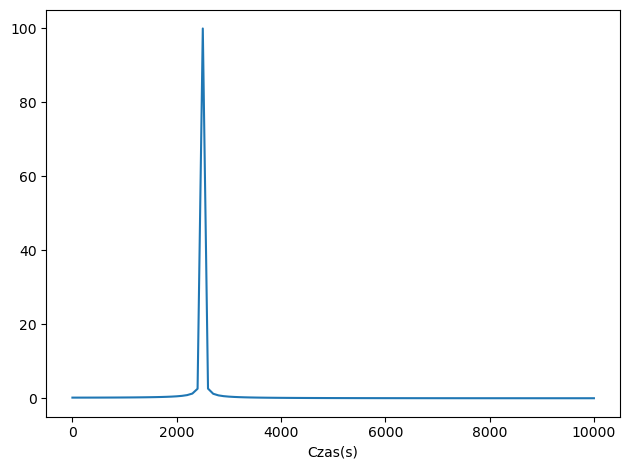

In [22]:
from thinkdsp import decorate
fala.segment(start=0, duration=0.01).make_spectrum().plot()
decorate(xlabel='Czas(s)')

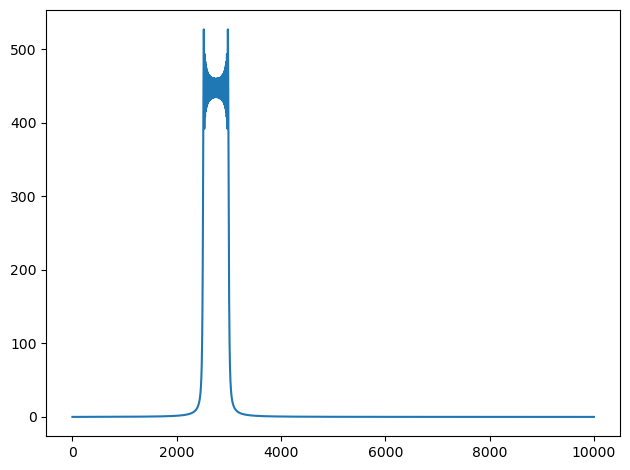

In [23]:
fala.make_spectrum().plot()
decorate()

### Zadanie 2

W muzyce terminem “glissando”  określa się płynne przejścia od jednego dźwięku do drugiego, co jest bliżone do sygnału świergotowego.  
Znajdź przykład glissando, wczytaj i przedstaw spektrogram pierwszych kilku sekund.  

Wskazówka:  Błękitna rapsodia George'a Gershwin’a rozpoczyna się od sławnego glissando na klarnecie. Mogą Państwo pobrać ten utwór z: [link](http://archive.org/details/rhapblue11924.)

Rozdzielczość czasowa (s) 0.023219954648526078
Rozdzielczość częstotliwościowa (Hz) 43.06640625


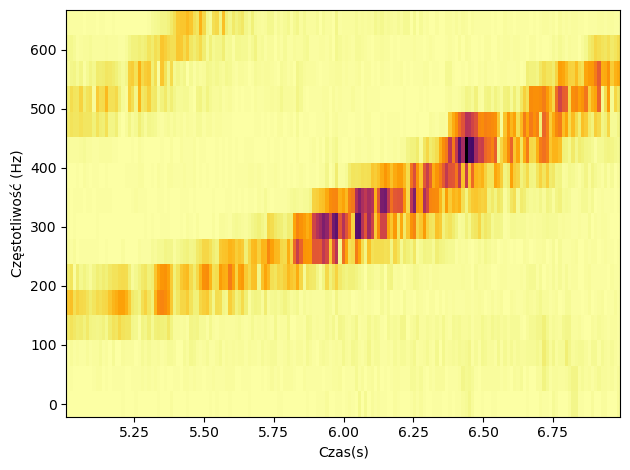

In [32]:
from thinkdsp import read_wave
melodia=read_wave(filename='glissando.wav')
#melodia.make_audio()
frag=melodia.segment(start=5, duration=2)
#frag.make_audio()
plot_spectrogram(frag,1024)

### Zadanie 3

“A Soft Murmur” jest stroną zawierającą dźwięki naturalnych szumów, np.: deszcz, fale, wiart, itp. Dźwięki te można pobrać z tej [strony](https://asoftmurmur.com/about/).  
Proszę o pobranie kilku plików i wyznaczyć spektrum dla każdego z nich oraz odpowiedzieć, czy spektrum mocy wygląda jak szum biały, różowy czy czrwony? Czy spektrum zmienia się w czasie?

In [25]:
from thinkdsp import read_wave
mel1=read_wave(filename='north-sea.wav').segment(start=5,duration=0.1)
mel2=read_wave(filename='crickets-texas.wav').segment(start=5,duration=0.1 )
mel3=read_wave(filename='rain-late-at-night.wav').segment(start=5,duration=0.1 )


#### Plik nr 1

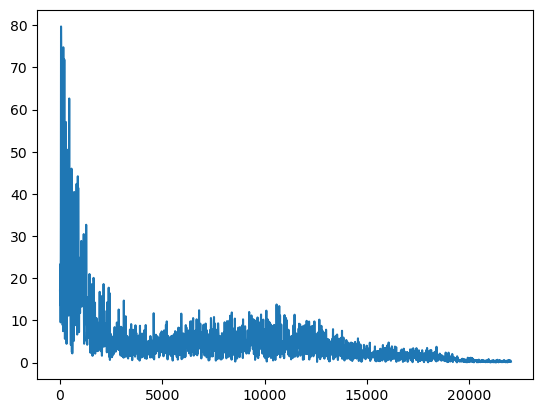

In [26]:
mel1.make_spectrum().plot()

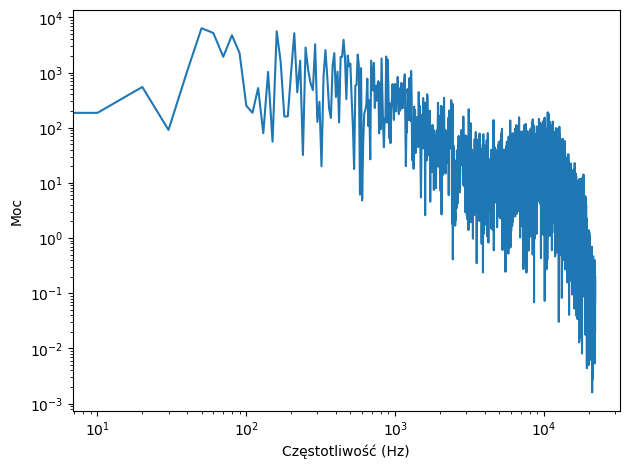

In [27]:
mel1.make_spectrum().plot_power(linewidth=1.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Częstotliwość (Hz)', ylabel='Moc',**loglog)

##### Wniosek:  


Spektrum mocy dla fali z pliku 1 wygląda jak szum czerwony

#### Plik nr 2


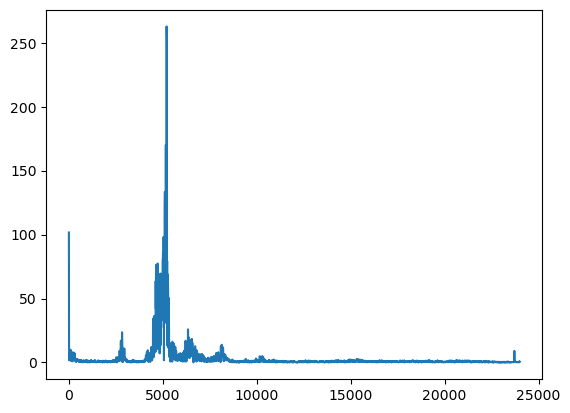

In [28]:
mel2.make_spectrum().plot()

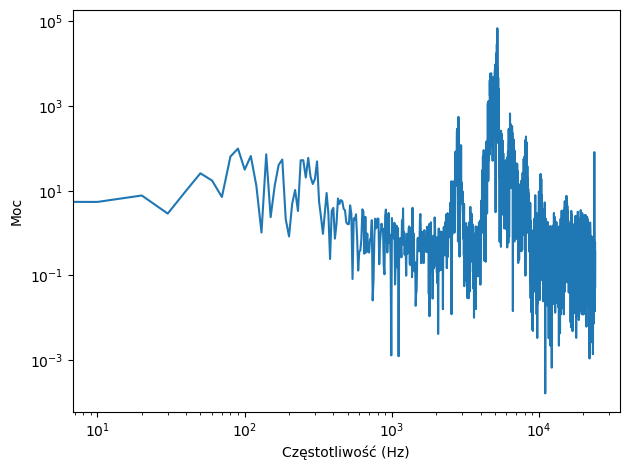

In [29]:
mel2.make_spectrum().plot_power(linewidth=1.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Częstotliwość (Hz)', ylabel='Moc',**loglog)

##### Wniosek:  


Spektrum mocy dla fali z pliku 2 wygląda jak szum różowy

#### Plik nr 3


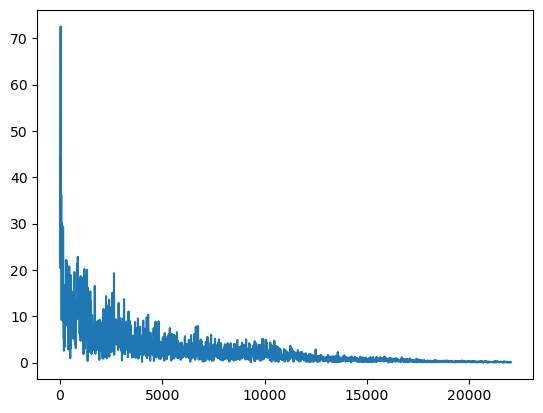

In [30]:
mel3.make_spectrum().plot()

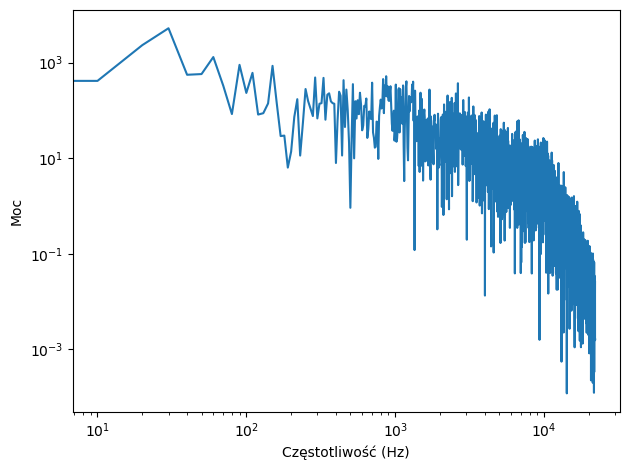

In [31]:
mel3.make_spectrum().plot_power(linewidth=1.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Częstotliwość (Hz)', ylabel='Moc',**loglog)

##### Wniosek:  


Spektrum mocy dla fali z pliku 3 wygląda jak szum czerwony